# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [243]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [244]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [245]:
#  1. Get the total rides for each city type
city_total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [246]:
# 2. Get the total drivers for each city type
drivers_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [247]:
# Combine the data into a single dataset.
# pyber_complete = pd.merge(ride_data_df, city_data_df, on=["city", "city"])
# fares_city_type = ride_data_df.groupby(["city"]) & ride_data_df.groupby([type]).sum()["fare"]
# fares_city_type

In [248]:
#  3. Get the total amount of fares for each city 
fares_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [249]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_type = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_per_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [250]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = fares_city_type / drivers_city_type #pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df["driver_count"].count()
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [315]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": city_total_rides,
    "Total Drivers": drivers_city_type,
    "Total Fares": fares_city_type,
    "Average Fare Per Ride": average_fare_per_type,
    "Average Fare Per Driver": average_fare_per_driver
   })
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [316]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("{:,.2f}".format)

pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("{:.2f}".format)




In [317]:
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"4,327.93",$34.62,55.49
Suburban,625,490,"19,356.33",$30.97,39.50
Urban,1625,2405,"39,854.38",$24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [318]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [319]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_df = pyber_data_df.groupby(["date","type"]).sum(["fare"])
sum_fares_df.head()


,,fare,ride_id,driver_count
date,type,,,
1/1/2019 0:08,Urban,37.91,5.673670e+12,69
1/1/2019 0:46,Suburban,47.74,2.215910e+12,23
1/1/2019 12:32,Suburban,25.56,2.613540e+12,1
1/1/2019 14:40,Urban,5.42,5.676170e+12,46
1/1/2019 14:42,Urban,12.31,4.757040e+12,45


In [320]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
reset_sum_fares_df = sum_fares_df.reset_index()
reset_sum_fares_df

,date,type,fare,ride_id,driver_count
0,1/1/2019 0:08,Urban,37.91,5.673670e+12,69
1,1/1/2019 0:46,Suburban,47.74,2.215910e+12,23
2,1/1/2019 12:32,Suburban,25.56,2.613540e+12,1
3,1/1/2019 14:40,Urban,5.42,5.676170e+12,46
4,1/1/2019 14:42,Urban,12.31,4.757040e+12,45
...,...,...,...,...,...
2359,5/8/2019 1:54,Urban,32.69,1.643410e+12,25
2360,5/8/2019 2:31,Urban,41.33,5.688920e+12,4
2361,5/8/2019 4:20,Urban,21.99,1.179980e+11,52
2362,5/8/2019 4:39,Urban,18.45,1.811570e+12,11


In [321]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
reset_sum_fares_pivot_df = reset_sum_fares_df.pivot(index="date", columns="type", values="fare")
reset_sum_fares_pivot_df
# https://www.geeksforgeeks.org/python-pandas-pivot/

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [322]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
reset_sum_fares_pivot_df.index = pd.to_datetime(reset_sum_fares_pivot_df.index)
pivot_by_dates_df = reset_sum_fares_pivot_df.loc["2019-01-01":"2019-04-29"]
pivot_by_dates_df


C:\Users\saloh\anaconda..3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [323]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#pivot_by_dates_df.index = pd.to_datetime(pivot_by_dates_df.index)
#pivot_by_dates_df

In [324]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_by_dates_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [325]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_resample = pivot_by_dates_df.resample("W").sum()
# pivot_resample_1 = pivot_resample.drop(pivot_resample.index["2019-05-05"])
pivot_resample


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


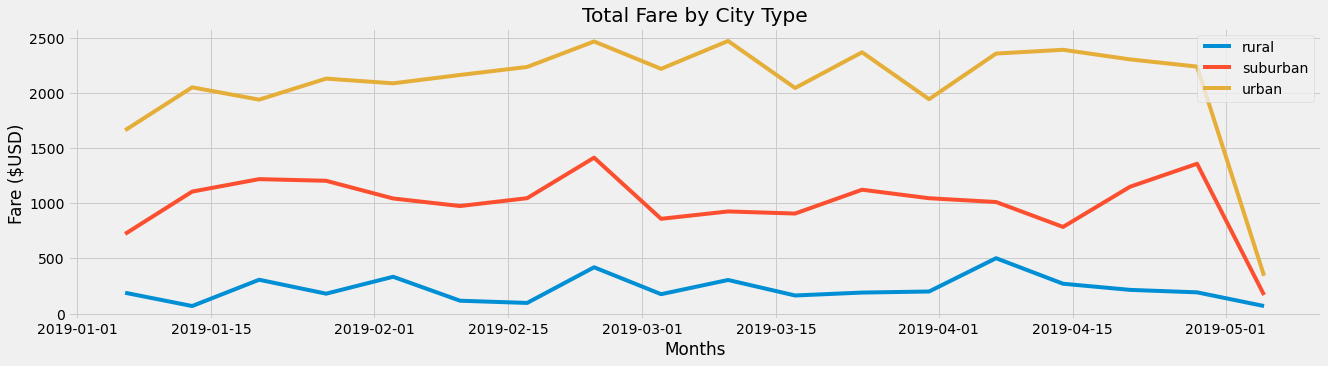

In [326]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(pivot_resample)
ax.set_xlabel('Months')
ax.set_ylabel('Fare ($USD)')
ax.set_title("Total Fare by City Type")
#ax.plot(x, y, label='Type')
ax.legend(["rural", "suburban", "urban"])
#ax.set_ylim(0, 2500)
#ax.set_xlim("2019-1-1", "2019-4-28")
#ax.legend(loc="center")


#pivot_resample.plot()
#plt.subplots(figsize=(20, 5))
#plt.xlabel('Months')
#plt.ylabel('Fare ($USD)')
#plt.title("Total Fare by City Type")
#plt.ylim(0, 2500)


In [242]:
#plt.savefig("Resources/pyber_data.png")